## Import pandas and matplotlib

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## Read csv from NYC Open Data 
(Source: https://data.cityofnewyork.us/Social-Services/Rat-Sightings/3q43-55fe/about_data)

All 311 Service Requests from 2010 to june 2024.

In [9]:
df = pd.read_csv('./rat_sightings_20240701.csv', low_memory=False)
df.head(5)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,61226888,05/21/2024 08:50:26 AM,05/21/2024 08:50:26 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Other (Explain Below),11377.0,51 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.754279,-73.909011,"(40.754279156953174, -73.90901085358233)"
1,60310305,02/13/2024 11:34:17 AM,02/13/2024 11:34:17 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Other (Explain Below),11218.0,1241 REEVE PLACE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,61122654,05/10/2024 07:00:53 PM,05/10/2024 07:00:53 PM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Other (Explain Below),11385.0,1877 GROVE STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.705636,-73.908385,"(40.70563608025511, -73.90838475061248)"
3,61320984,05/31/2024 08:01:48 AM,05/31/2024 08:01:48 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Commercial Building,11102.0,26-21 31 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.769171,-73.919095,"(40.76917142887726, -73.91909545562078)"
4,61366930,06/04/2024 08:23:48 PM,06/04/2024 08:23:48 PM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Other (Explain Below),11366.0,78 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721649,-73.809593,"(40.72164880204784, -73.80959308906253)"


### Check type of the Columns

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246621 entries, 0 to 246620
Data columns (total 38 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      246621 non-null  int64  
 1   Created Date                    246621 non-null  object 
 2   Closed Date                     228922 non-null  object 
 3   Agency                          246621 non-null  object 
 4   Agency Name                     246621 non-null  object 
 5   Complaint Type                  246621 non-null  object 
 6   Descriptor                      246621 non-null  object 
 7   Location Type                   246609 non-null  object 
 8   Incident Zip                    246190 non-null  float64
 9   Incident Address                235688 non-null  object 
 10  Street Name                     235687 non-null  object 
 11  Cross Street 1                  220226 non-null  object 
 12  Cross Street 2  

### Check for missing data

In [68]:
# Check for missing values
df.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                        17699
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                             0
Location Type                         12
Incident Zip                         431
Incident Address                   10933
Street Name                        10934
Cross Street 1                     26395
Cross Street 2                     26375
Intersection Street 1             118291
Intersection Street 2             118242
Address Type                         478
City                                3850
Landmark                          139346
Facility Type                     246621
Status                                 0
Due Date                          114389
Resolution Action Updated Date      9318
Community Board                        4
Borough                                4
X Coordinate (St

## Analyse Dataset

### Sigthings by Borough

In [69]:
# Remove Unspecified boroughs and save to existing data
df = df[df['Borough'] != 'Unspecified']

# rat sightings by borough
df_borough = df['Borough'].value_counts()

<Axes: title={'center': 'Rat Sightings by Borough'}, ylabel='Borough'>

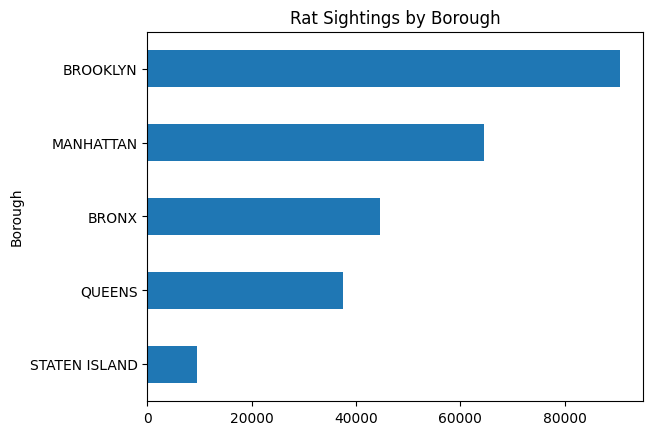

In [70]:
# plot rat sightings by borough horizontal bar chart sorted by count
df['Borough'].value_counts().sort_values().plot(kind='barh', title='Rat Sightings by Borough')


For 2023


In [71]:

# Convert 'Created Date' to datetime format
df['Created Date'] = pd.to_datetime(df['Created Date'])

# df['Borough'].value_counts() just for year 2022
df_2023 = df[df['Created Date'].dt.year == 2023]

df_2023_by_borough = df_2023['Borough'].value_counts()

<Axes: title={'center': 'Rat Sightings by Borough in 2023'}, ylabel='Borough'>

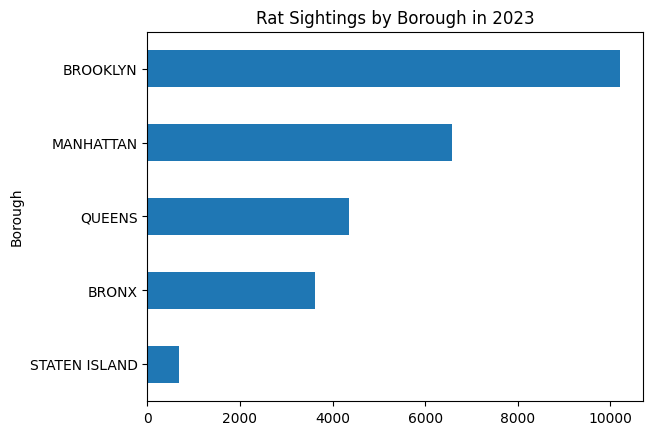

In [72]:
df_2023['Borough'].value_counts().sort_values().plot(kind='barh', title='Rat Sightings by Borough in 2023')


In [73]:
# export df_2023_by_borough to csv
df_2023_by_borough.to_csv('./data/rat_sightings_2023_by_borough.csv')

### Rat Sighting by Zip Code for all years

In [74]:
# rat sightings by zip code
df['Incident Zip'].value_counts()

Incident Zip
11221.0    6623
10025.0    6448
11216.0    6280
11238.0    6043
11233.0    4434
           ... 
10271.0       1
11202.0       1
10174.0       1
11242.0       1
10115.0       1
Name: count, Length: 208, dtype: int64

### Plotting a time series of rat sightings by date

<Axes: title={'center': 'Rat Sightings by Date'}, xlabel='Created Date'>

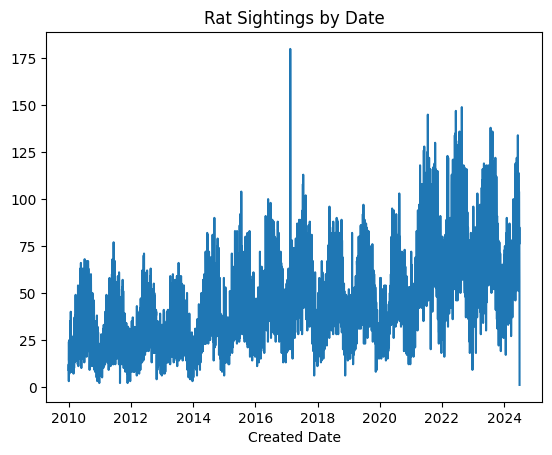

In [75]:
# line plot of rat sightings by date
df['Created Date'] = pd.to_datetime(df['Created Date'])
df['Created Date'].dt.date.value_counts().sort_index().plot(title='Rat Sightings by Date')

Timeserie by Borough

<Axes: title={'center': 'Rat Sightings by Borough and Month'}, xlabel='Created Date'>

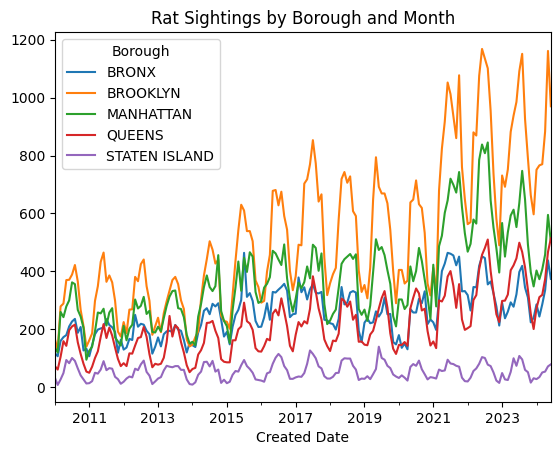

In [76]:
# line plot of rat sightings by date

# Convert 'Created Date' to datetime format
df['Created Date'] = pd.to_datetime(df['Created Date'])

# Group by 'Borough' and 'Created Date', then count sightings for each date within each borough
# Unstack the 'Borough' to get borough-wise columns
# Resample by month ('ME') and sum the counts to get total sightings per month for each borough
# Plot the data
df.groupby('Borough')['Created Date'].value_counts().unstack(0).resample('ME').sum().plot(title='Rat Sightings by Borough and Month')


Timeserie for Manhattan

<Axes: title={'center': 'Rat Sightings in Manhattan by Date'}, xlabel='Created Date'>

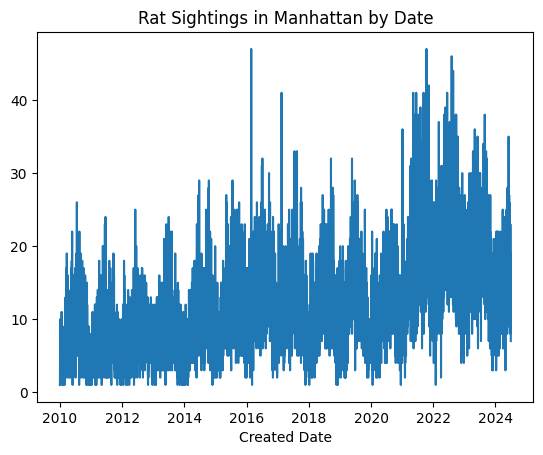

In [77]:
# line plot of rat sightings by date for manhattan
df[df['Borough'] == 'MANHATTAN']['Created Date'].dt.date.value_counts().sort_index().plot(title='Rat Sightings in Manhattan by Date')


Timeserie for Brooklyn

<Axes: title={'center': 'Rat Sightings in Brooklyn by Date'}, xlabel='Created Date'>

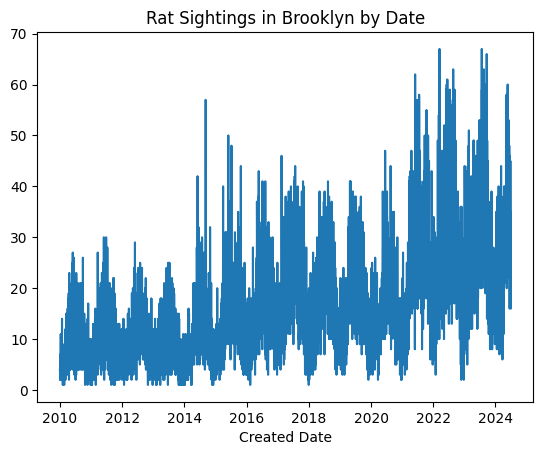

In [78]:
# line plot of rat sightings by date for manhattan
df[df['Borough'] == 'BROOKLYN']['Created Date'].dt.date.value_counts().sort_index().plot(title='Rat Sightings in Brooklyn by Date')

### Dates with the most rat sightings

In [79]:
# 10 days with the most rat sightings
df['Created Date'].dt.date.value_counts().nlargest(10)

Created Date
2017-02-15    180
2022-08-22    149
2022-06-13    147
2021-07-19    145
2023-07-26    138
2022-07-26    136
2023-08-17    136
2022-06-06    135
2022-06-01    134
2024-06-10    134
Name: count, dtype: int64

In [80]:
# date of the most rat sighting
df['Created Date'].dt.date.value_counts().idxmax()

datetime.date(2017, 2, 15)

dates with the most rat sightings for manhattan

In [81]:
# three dates of the most rat sighting in manhattan
df[df['Borough'] == 'MANHATTAN']['Created Date'].dt.date.value_counts().nlargest(3)

Created Date
2021-10-13    47
2016-02-25    47
2022-08-05    46
Name: count, dtype: int64

### Rat sigthings by year

In [82]:
# rat sightings by year and sort by year
df['Created Date'].dt.year.value_counts().sort_index(ascending=False)


Created Date
2024    12578
2023    25446
2022    26498
2021    25012
2020    16262
2019    16804
2018    17350
2017    19152
2016    17230
2015    15286
2014    12617
2013    10739
2012    10642
2011    10454
2010    10534
Name: count, dtype: int64

<Axes: title={'center': 'Rat Sightings by Year'}, ylabel='Created Date'>

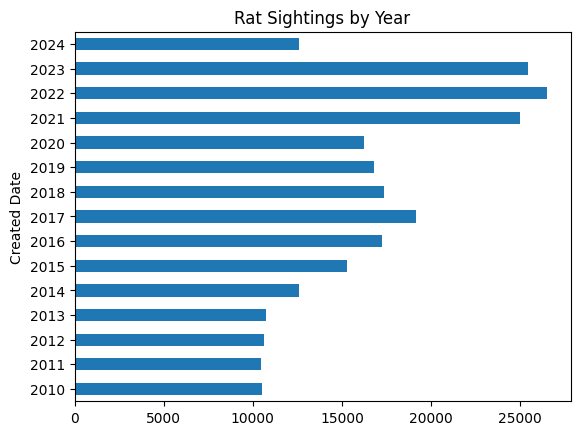

In [83]:
# plot rat sightings by year
df['Created Date'].dt.year.value_counts().sort_index(ascending=True).plot(kind='barh', title='Rat Sightings by Year')

In [84]:
# export rat sightings by year to csv
df['Created Date'].dt.year.value_counts().sort_index(ascending=True).to_csv('./data/rat_sightings_by_year.csv')

## Rat sightings by weekday

Created Date
Friday       35068
Monday       41792
Saturday     23957
Sunday       24333
Thursday     39237
Tuesday      41459
Wednesday    40758
Name: count, dtype: int64

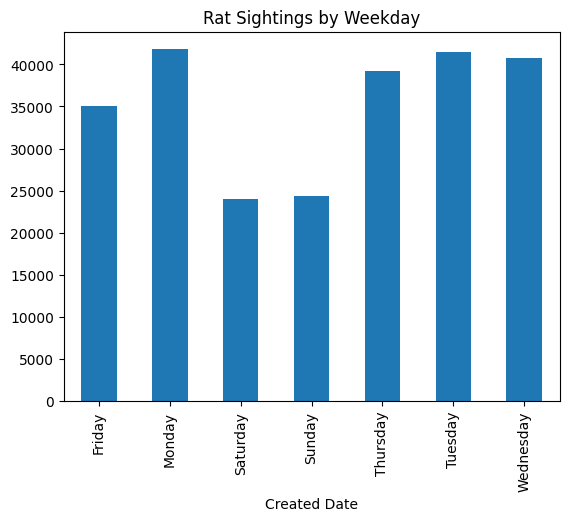

In [85]:
# rats sightings by weekday
df['Created Date'].dt.day_name().value_counts()

# plot rat sightings by weekday
# df['Created Date'].dt.day_name().value_counts().plot(kind='bar')

# sum of rat sightings by weekday and plot
df['Created Date'].dt.day_name().value_counts().sort_index().plot(kind='bar', title='Rat Sightings by Weekday')

# sum of rat sightings by weekday and total count for all weekdays
df['Created Date'].dt.day_name().value_counts().sort_index()



by weekday just for Brooklyn

In [86]:
# sum of rat sightings by weekday for manhattan
df[df['Borough'] == 'BROOKLYN']['Created Date'].dt.day_name().value_counts().sort_index()


Created Date
Friday       12934
Monday       15270
Saturday      8600
Sunday        8906
Thursday     14387
Tuesday      15326
Wednesday    15112
Name: count, dtype: int64

<Axes: title={'center': 'Rat Sightings by Weekday in Brooklyn'}, xlabel='Created Date'>

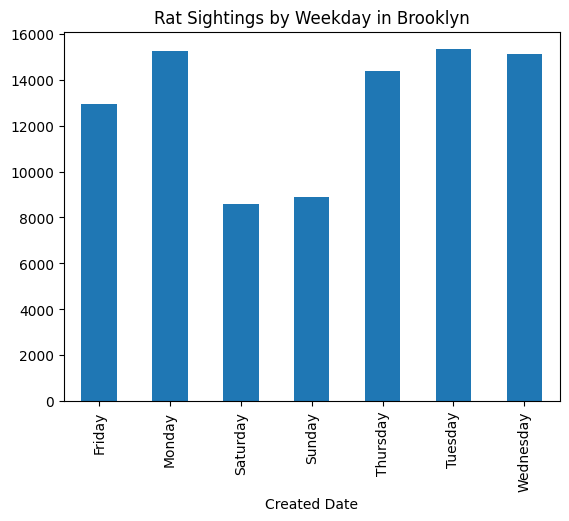

In [87]:
# plot rat sightings by weekday for manhattan
df[df['Borough'] == 'BROOKLYN']['Created Date'].dt.day_name().value_counts().sort_index().plot(kind='bar', title='Rat Sightings by Weekday in Brooklyn')

### Rat sightings by months

In [88]:
# irst create a DataFrame that counts the occurrences of each 'month_year' combination,
# then pivot this DataFrame to have months as columns and years as rows.

# Step 1: Convert 'Created Date' to datetime if not already done
df['Created Date'] = pd.to_datetime(df['Created Date'])

# Step 2: Extract month and year into a new column
df['month_year'] = df['Created Date'].dt.to_period('M')

# Step 3: Count occurrences of each 'month_year'
month_year_counts = df['month_year'].value_counts().sort_index()

# Step 4: Convert the Series to a DataFrame
month_year_df = month_year_counts.reset_index()
month_year_df.columns = ['month_year', 'count']

# Step 5: Extract year and month from 'month_year' to separate columns
month_year_df['year'] = month_year_df['month_year'].dt.year
month_year_df['month'] = month_year_df['month_year'].dt.month

# Step 6: Pivot the DataFrame to have years as rows and months as columns
pivot_df = month_year_df.pivot(index='year', columns='month', values='count')

pivot_df

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2010,528.0,425.0,831.0,912.0,1066.0,1161.0,1289.0,1321.0,1040.0,875.0,651.0,435.0
2011,459.0,563.0,825.0,977.0,1126.0,1250.0,1041.0,1131.0,1084.0,835.0,595.0,568.0
2012,669.0,589.0,791.0,798.0,1142.0,1076.0,1177.0,1269.0,1024.0,899.0,568.0,640.0
2013,729.0,640.0,838.0,1001.0,1159.0,1137.0,1217.0,1105.0,981.0,855.0,569.0,508.0
2014,521.0,541.0,782.0,990.0,1236.0,1411.0,1397.0,1415.0,1304.0,1417.0,856.0,747.0
2015,728.0,608.0,1002.0,1247.0,1497.0,1550.0,1907.0,1550.0,1613.0,1501.0,1089.0,994.0
2016,944.0,1044.0,1261.0,1284.0,1813.0,1840.0,1769.0,1854.0,1775.0,1524.0,1121.0,1001.0
2017,1158.0,1494.0,1406.0,1688.0,1739.0,1882.0,2199.0,2011.0,1711.0,1756.0,1169.0,939.0
2018,965.0,1058.0,1087.0,1394.0,1889.0,1869.0,1827.0,1910.0,1690.0,1688.0,1050.0,923.0


export the table as csv

In [89]:
# export pivot to csv
pivot_df.to_csv('./data/pivot_rat_sightings.csv')

### Are rats movig during season? looking for difference between winter and month

In [90]:
# Assuming df is already loaded with data

# Now apply the filtering
winter_months = [12, 1, 2]
df_winter = df[df['Created Date'].dt.month.isin(winter_months) & (df['Created Date'].dt.year == 2023)]




### Rat sightings by Zip Code then merge it with unique City and Borough for each Incident Zip to get a list for export
Just for 2022, because population data on zip code level exist just for 2022

In [91]:
# Convert 'Incident Zip' to numeric, coercing errors to NaN, then fill NaNs with 0
df['Incident Zip'] = pd.to_numeric(df['Incident Zip'], errors='coerce').fillna(0).astype(int)

df_2022 = df[df['Created Date'].dt.year == 2022]

## old version
# sum of rat sightings for year 2022
# rat_sightings_2022 = df_2022['Incident Zip'].value_counts()
# rat_sightings_2022

# group the rat_sightings_2022 by city and borough

# Step 1: Aggregate rat sightings by 'Incident Zip' with size() method to get the count of sightings
rat_sightings_count = df_2022.groupby('Incident Zip').size().reset_index(name='Sightings')

# Step 2: Get unique City and Borough for each 'Incident Zip'
city_borough_mapping = df_2022.groupby('Incident Zip')[['City', 'Borough']].first().reset_index()

# Step 3: Merge the aggregated sightings with city and borough information
rat_sightings_2022 = pd.merge(rat_sightings_count, city_borough_mapping, on='Incident Zip', how='left')

rat_sightings_2022.sort_values('Sightings', ascending=False)


,Incident Zip,Sightings,City,Borough
21,10025,995,NEW YORK,MANHATTAN
104,11216,674,BROOKLYN,BROOKLYN
114,11226,627,BROOKLYN,BROOKLYN
109,11221,624,BROOKLYN,BROOKLYN
124,11237,618,BROOKLYN,BROOKLYN
...,...,...,...,...
169,11430,1,JAMAICA,QUEENS
37,10041,1,NEW YORK,MANHATTAN
38,10044,1,NEW YORK,MANHATTAN
89,11109,1,LONG ISLAND CITY,QUEENS


In [92]:
# read population-nyc-2022.csv and merge column B01003001 with Incident Zip in rat_sightings_2022
population = pd.read_csv('./population-nyc-2022.csv')

# population.head(5)
# print(population.dtypes)

# format column B01003001 to integer
population['B01003001'] = population['B01003001'].astype(int)


# remove the first row of the population dataframe
population = population.iloc[1:]

# format geoid to integer
population['name'] = population['name'].astype(int)


# rename column B01003001 to 'Population'
population.rename(columns={'B01003001': 'Population'}, inplace=True)

# match name in population with incident zip in rat_sightings_2022 and than merge the column population to rat_sightings_202

# 1. Selects only the name and population columns from the population DataFrame for the merge.
# 2. Merges rat_sightings_2022 with the selected columns from population, matching on Incident Zip from rat_sightings_2022 and name from population.
# 3. Drops the name column after the merge, as it's redundant with Incident Zip.

rat_sightings_2022 = pd.merge(rat_sightings_2022, population[['name', 'Population']], left_on='Incident Zip', right_on='name', how='left').drop(columns=['name'])

# remove rows where population is NaN
rat_sightings_2022 = rat_sightings_2022.dropna(subset=['Population'])
rat_sightings_2022

,Incident Zip,Sightings,City,Borough,Population
0,10001,114,NEW YORK,MANHATTAN,27004.0
1,10002,177,NEW YORK,MANHATTAN,76518.0
2,10003,221,NEW YORK,MANHATTAN,53877.0
3,10004,14,NEW YORK,MANHATTAN,4579.0
4,10005,11,NEW YORK,MANHATTAN,8801.0
...,...,...,...,...,...
174,11436,31,JAMAICA,QUEENS,21349.0
175,11691,68,FAR ROCKAWAY,QUEENS,70365.0
176,11692,7,ARVERNE,QUEENS,24584.0
177,11693,3,FAR ROCKAWAY,QUEENS,13558.0


In [93]:
# read population-nyc-2022.csv and merge column B01003001 with Incident Zip in rat_sightings_2022
population = pd.read_csv('./population-nyc-2022.csv')

# format column B01003001 to integer
population['B01003001'] = population['B01003001'].astype(int)

# remove the first row of the population dataframe because it contains the total population of NYC
population = population.iloc[1:]

# format geoid to integer
population['name'] = population['name'].astype(int)


# rename column B01003001 to 'Population'
population.rename(columns={'B01003001': 'Population'}, inplace=True)

# match name in population with incident zip in rat_sightings_2022 and than merge the column population to rat_sightings_202

# 1. Selects only the name and population columns from the population DataFrame for the merge.
# 2. Merges rat_sightings_2022 with the selected columns from population, matching on Incident Zip from rat_sightings_2022 and name from population.
# 3. Drops the name column after the merge, as it's redundant with Incident Zip.

if 'Population' not in rat_sightings_2022.columns:
    rat_sightings_2022 = pd.merge(rat_sightings_2022, population[['name', 'Population']], left_on='Incident Zip', right_on='name', how='left').drop(columns=['name'])

# Convert 'Population' to integer after the merge to ensure no decimals
rat_sightings_2022['Population'] = pd.to_numeric(rat_sightings_2022['Population'], downcast='integer', errors='coerce')


# Remove rows where population is NaN
rat_sightings_2022 = rat_sightings_2022.dropna(subset=['Population'])

rat_sightings_2022

,Incident Zip,Sightings,City,Borough,Population
0,10001,114,NEW YORK,MANHATTAN,27004
1,10002,177,NEW YORK,MANHATTAN,76518
2,10003,221,NEW YORK,MANHATTAN,53877
3,10004,14,NEW YORK,MANHATTAN,4579
4,10005,11,NEW YORK,MANHATTAN,8801
...,...,...,...,...,...
174,11436,31,JAMAICA,QUEENS,21349
175,11691,68,FAR ROCKAWAY,QUEENS,70365
176,11692,7,ARVERNE,QUEENS,24584
177,11693,3,FAR ROCKAWAY,QUEENS,13558


In [94]:
# read nta-nyc-2022.csv and merge column NTAName with Incident Zip in rat_sightings_2022
nta = pd.read_csv('./nta-nyc-2022.csv')
# nta.info()

# Fill NaN values with a placeholder before converting to int
nta['ZIP'] = nta['ZIP'].fillna(0).astype(int)

# Perform the merge while keeping all columns from rat_sightings_2022 and adding the NTA column from nta
if 'NTA' not in rat_sightings_2022.columns:
    rat_sightings_2022 = pd.merge(rat_sightings_2022, nta[['ZIP', 'NTA']], left_on='Incident Zip', right_on='ZIP', how='left') \
        .drop(columns=['ZIP']) \
        .drop_duplicates(subset=['Incident Zip'])

rat_sightings_2022 = rat_sightings_2022.sort_values('Sightings', ascending=False)
rat_sightings_2022.reset_index(drop=True)

,Incident Zip,Sightings,City,Borough,Population,NTA
0,10025,995,NEW YORK,MANHATTAN,96988,Upper West Side
1,11216,674,BROOKLYN,BROOKLYN,62373,Bedford
2,11226,627,BROOKLYN,BROOKLYN,101053,Flatbush
3,11221,624,BROOKLYN,BROOKLYN,91236,Stuyvesant Heights
4,11237,618,BROOKLYN,BROOKLYN,47183,Bushwick North
...,...,...,...,...,...,...
173,11693,3,FAR ROCKAWAY,QUEENS,13558,NaN
174,10162,2,NEW YORK,MANHATTAN,1523,Lenox Hill-Roosevelt Island
175,10044,1,NEW YORK,MANHATTAN,11846,Lenox Hill-Roosevelt Island
176,11109,1,LONG ISLAND CITY,QUEENS,7280,Hunters Point-Sunnyside-West Maspeth


### Look for changes for Zip 10001, 10002 and 10003

<Axes: title={'center': 'Rat Sightings in Zip Codes 10001, 10002, 10003'}, xlabel='Month-Year', ylabel='Sightings'>

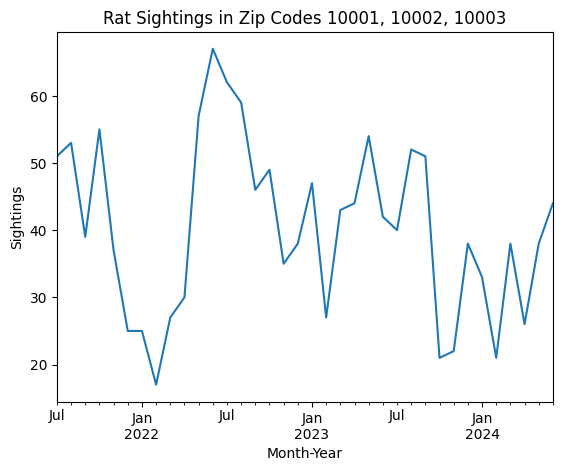

In [95]:
# Step 1: Ensure 'Created Date' is a datetime column
df['Created Date'] = pd.to_datetime(df['Created Date'])

# Step 2: Create 'month_year' column
df['month_year'] = df['Created Date'].dt.to_period('M')

# Step 3: Filter for specified zip codes and group by 'month_year' show the last 12 months
zip_filtered_counts = df[df['Incident Zip'].isin([10001, 10002, 10003])].groupby('month_year').size().tail(36)

# Step 4: Plot the result
zip_filtered_counts.plot(title='Rat Sightings in Zip Codes 10001, 10002, 10003', xlabel='Month-Year', ylabel='Sightings')

In [96]:

# Step 1: Ensure 'Created Date' is a datetime column
df['Created Date'] = pd.to_datetime(df['Created Date'])

# Step 2: Create 'year' column and add it to the DataFrame
df['year'] = df['Created Date'].dt.year

# Step 3: rat sightings by borough and year in a DataFrame exclude 2024
borough_year_counts = df[df['year'] != 2024].groupby(['Borough', 'year']).size().unstack()

# Step 4: Plot the result
borough_year_counts

# export borough_year_counts to csv
borough_year_counts.to_csv('./data/borough_year_counts.csv')


### top 50 streets with the most rat sightings

In [97]:

df['Created Date'] = pd.to_datetime(df['Created Date'])
df_2023 = df[df['year'].isin([2023])].copy()

#export to csv
df_2023.to_csv('./data/rat_sightings_2023.csv')

# count all entries in 2023
df_2023_count = df_2023['Unique Key'].value_counts().shape[0]
print(df_2023_count)
print("-------------")

# summe rat sightings in 2023 by street
top_streets_by_sightings = df_2023['Incident Address'].value_counts().shape[0]
print(top_streets_by_sightings )
print("-------------")



# top 50 'Incident Address' entries in 2023, print out wiht column Location
top_streets_by_sightings = df_2023['Incident Address'].value_counts().nlargest(50)

# top_streets_by_sightings to every Incident Address i want the Location but dont remove counts
top_streets_by_sightings = df_2023.groupby('Incident Address')['Location'].first().loc[top_streets_by_sightings.index]

print(top_streets_by_sightings)





25446
-------------
17039
-------------
Incident Address
18 EAST  198 STREET          (40.871206842739696, -73.89276442848653)
256 STAGG STREET              (40.70993537839809, -73.93883988012956)
41-49 150 STREET              (40.76152264872703, -73.81341016404748)
905 TINTON AVENUE              (40.82190214370828, -73.9034771211016)
365 WEST   25 STREET          (40.74742577604953, -73.99955248159598)
145-03 ROCKAWAY BOULEVARD    (40.673661614991815, -73.79350021263693)
260 PARKHILL AVENUE           (40.61267682810136, -74.08307761783473)
420 EAST   85 STREET          (40.77580610173381, -73.94897559849409)
249 BEACH   15 STREET        (40.597020881541596, -73.74907884692875)
114 EAST   35 STREET          (40.74741032781963, -73.98006378135585)
258 STAGG STREET              (40.70994357625274, -73.93877133978111)
123 EAST  129 STREET         (40.807081289396386, -73.93592944446117)
38 EAST   98 STREET           (40.78862591017375, -73.95345456145927)
1030 CARROLL STREET          (40.

### Plot all incidents on a map

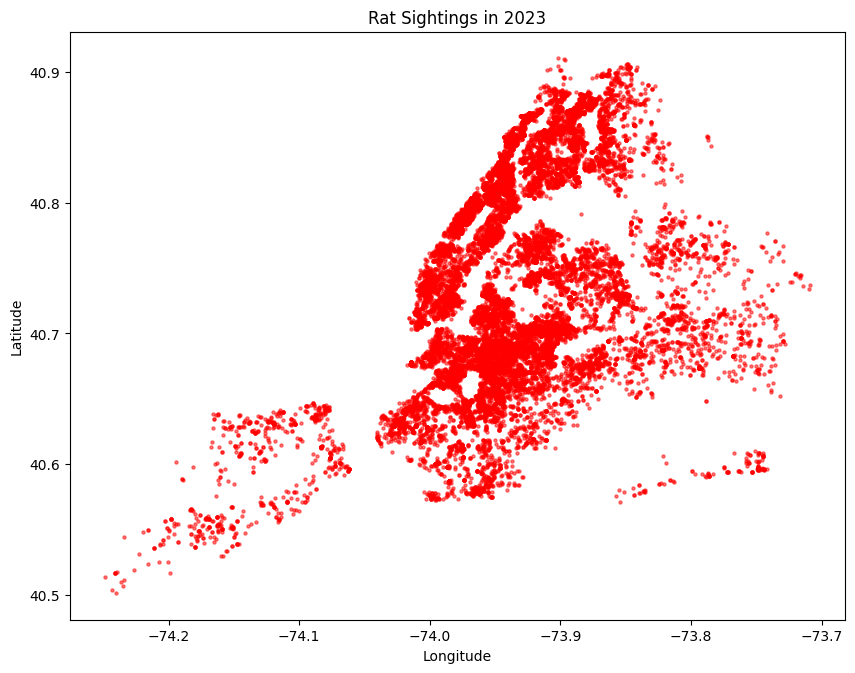

In [98]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Load the CSV file
csv_path = './Rat_Sightings_20240701.csv'  # Ensure the file is in the correct path
df = pd.read_csv(csv_path, low_memory=False)

# Ensure the 'Created Date' column is in datetime format
df['Created Date'] = pd.to_datetime(df['Created Date'], errors='coerce')

# Extract year from 'Created Date' and create a new 'year' column
df['year'] = df['Created Date'].dt.year

# Filter for rat sightings from 2023
df_2023 = df[df['year'].isin([2023])].copy()

# Define the column names for latitude and longitude
latitude_col = 'Latitude'
longitude_col = 'Longitude'

# Check if 'geometry' column exists, if not create it
if 'geometry' not in df_2023.columns:
    # Ensure 'Latitude' and 'Longitude' columns exist
    if latitude_col in df_2023.columns and longitude_col in df_2023.columns:
        # Create 'geometry' column from 'Latitude' and 'Longitude'
        df_2023['geometry'] = [Point(xy) for xy in zip(df_2023[longitude_col], df_2023[latitude_col])]
        gdf_2023 = gpd.GeoDataFrame(df_2023, geometry='geometry')
        # Save the GeoDataFrame as a GeoJSON file
        geojson_path = './rat_sightings_2023.geojson'  # Ensure this path is correct and writable
        gdf_2023.to_file(geojson_path, driver='GeoJSON')
    else:
        print("Latitude and longitude columns are missing.")
else:
    gdf_2023 = gpd.GeoDataFrame(df_2023, geometry='geometry')
    # Save the GeoDataFrame as a GeoJSON file
    geojson_path = './rat_sightings_2023.geojson'  # Ensure this path is correct and writable
    gdf_2023.to_file(geojson_path, driver='GeoJSON')

# print(f'GeoJSON file saved to: {geojson_path}')

# Plot the data on a map
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
base = gdf_2023.plot(ax=ax, color='red', markersize=5, alpha=0.5)
plt.title('Rat Sightings in 2023')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


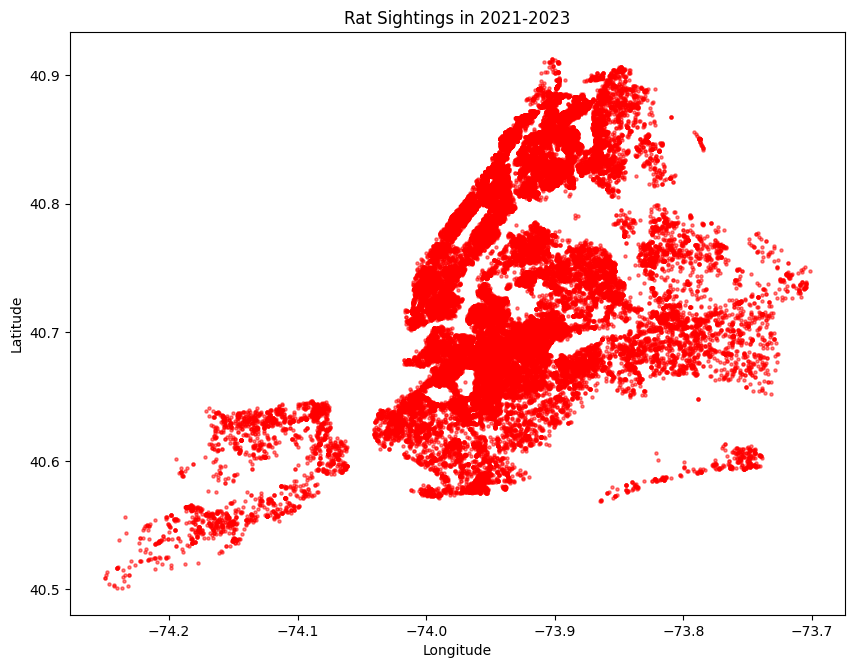

In [12]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Load the CSV file
csv_path = './rat_sightings_20240701.csv'  # Ensure the file is in the correct path
df = pd.read_csv(csv_path, low_memory=False)

# Ensure the 'Created Date' column is in datetime format
df['Created Date'] = pd.to_datetime(df['Created Date'], errors='coerce')

# Extract year from 'Created Date' and create a new 'year' column
df['year'] = df['Created Date'].dt.year

# Filter for rat sightings from 2021, 2022, and 2023
df_2021_2022_2023 = df[df['year'].isin([2021, 2022, 2023])].copy()

# Define the column names for latitude and longitude
latitude_col = 'Latitude'
longitude_col = 'Longitude'

# Check if 'geometry' column exists, if not create it
if 'geometry' not in df_2021_2022_2023.columns:
    # Ensure 'Latitude' and 'Longitude' columns exist
    if latitude_col in df_2021_2022_2023.columns and longitude_col in df_2021_2022_2023.columns:
        # Create 'geometry' column from 'Latitude' and 'Longitude'
        df_2021_2022_2023['geometry'] = [Point(xy) for xy in zip(df_2021_2022_2023[longitude_col], df_2021_2022_2023[latitude_col])]
        gdf_2021_2022_2023 = gpd.GeoDataFrame(df_2021_2022_2023, geometry='geometry')
        # Save the GeoDataFrame as a GeoJSON file
        geojson_path = './rat_sightings_2024.geojson'  # Ensure this path is correct and writable
        gdf_2021_2022_2023.to_file(geojson_path, driver='GeoJSON')
    else:
        print("Latitude and longitude columns are missing.")
else:
    gdf_2021_2022_2023 = gpd.GeoDataFrame(df_2021_2022_2023, geometry='geometry')
    # Save the GeoDataFrame as a GeoJSON file
    geojson_path = './rat_sightings_2021-2023.geojson'  # Ensure this path is correct and writable
    gdf_2021_2022_2023.to_file(geojson_path, driver='GeoJSON')

# print(f'GeoJSON file saved to: {geojson_path}')

# Plot the data on a map
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
base = gdf_2021_2022_2023.plot(ax=ax, color='red', markersize=5, alpha=0.5)
plt.title('Rat Sightings in 2021-2023')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


Plot sigthings in Winter and Summer to see if they move

/var/folders/fg/9vmq_tp10lv_kw_hsjpvgq840000gn/T/ipykernel_17712/2520617297.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Created Date'] = pd.to_datetime(df['Created Date'], errors='coerce')
/var/folders/fg/9vmq_tp10lv_kw_hsjpvgq840000gn/T/ipykernel_17712/2520617297.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_winter['geometry'] = [Point(xy) for xy in zip(df_winter[longitude_col], df_winter[latitude_col])]


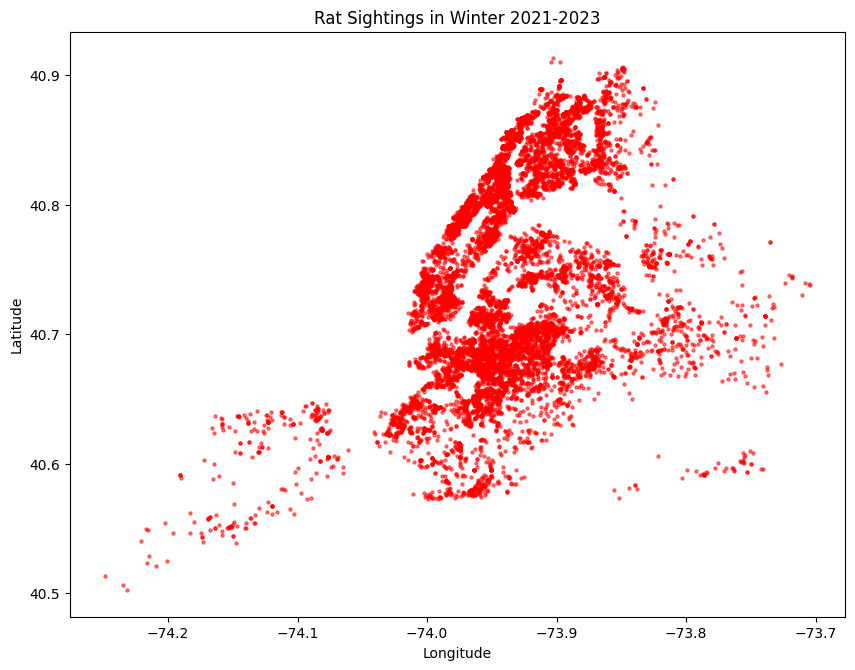

In [ ]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Load the CSV file
csv_path = './rat_sightings_20240701.csv'  # Ensure the file is in the correct path
df = pd.read_csv(csv_path, low_memory=False)

# Ensure the 'Created Date' column is in datetime format
df['Created Date'] = pd.to_datetime(df['Created Date'], errors='coerce')

# Extract year from 'Created Date' and create a new 'year' column
df['year'] = df['Created Date'].dt.year

# Assuming df is already loaded with data

# Now apply the filtering
winter_months = [12, 1, 2]
df_winter = df[df['Created Date'].dt.month.isin(winter_months) & df['Created Date'].dt.year.isin([2021, 2022, 2023])]


# Define the column names for latitude and longitude
latitude_col = 'Latitude'
longitude_col = 'Longitude'

# Check if 'geometry' column exists, if not create it
if 'geometry' not in df_winter.columns:
    # Ensure 'Latitude' and 'Longitude' columns exist
    if latitude_col in df_winter.columns and longitude_col in df_winter.columns:
        # Create 'geometry' column from 'Latitude' and 'Longitude'
        df_winter['geometry'] = [Point(xy) for xy in zip(df_winter[longitude_col], df_winter[latitude_col])]
        gdf_winter = gpd.GeoDataFrame(df_winter, geometry='geometry')
        # Save the GeoDataFrame as a GeoJSON file
        geojson_path = './rat_sightings_winter_2021-2023.geojson'  # Ensure this path is correct and writable
        gdf_winter.to_file(geojson_path, driver='GeoJSON')
    else:
        print("Latitude and longitude columns are missing.")
else:
    gdf_winter = gpd.GeoDataFrame(df_winter, geometry='geometry')
    # Save the GeoDataFrame as a GeoJSON file
    geojson_path = './rat_sightings_winter_2021-2023.geojson'  # Ensure this path is correct and writable
    gdf_winter.to_file(geojson_path, driver='GeoJSON')

# print(f'GeoJSON file saved to: {geojson_path}')

# Plot the data on a map
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
base = gdf_winter.plot(ax=ax, color='red', markersize=5, alpha=0.5)
plt.title('Rat Sightings in Winter 2021-2023')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


/var/folders/fg/9vmq_tp10lv_kw_hsjpvgq840000gn/T/ipykernel_17712/825541522.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Created Date'] = pd.to_datetime(df['Created Date'], errors='coerce')
/var/folders/fg/9vmq_tp10lv_kw_hsjpvgq840000gn/T/ipykernel_17712/825541522.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_summer['geometry'] = [Point(xy) for xy in zip(df_summer[longitude_col], df_summer[latitude_col])]


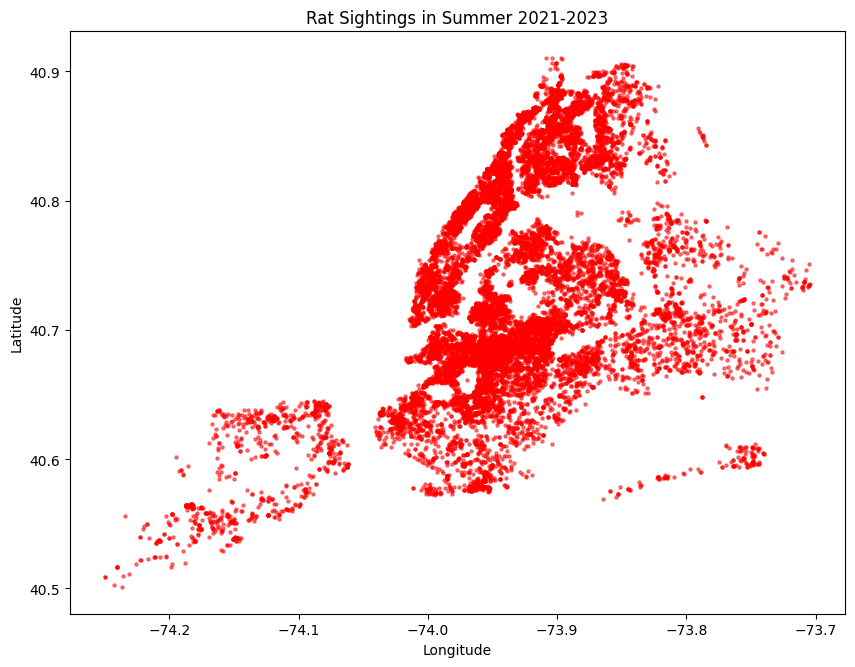

In [ ]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Load the CSV file
csv_path = './rat_sightings_20240701.csv'  # Ensure the file is in the correct path
df = pd.read_csv(csv_path, low_memory=False)

# Ensure the 'Created Date' column is in datetime format
df['Created Date'] = pd.to_datetime(df['Created Date'], errors='coerce')

# Extract year from 'Created Date' and create a new 'year' column
df['year'] = df['Created Date'].dt.year

# Assuming df is already loaded with data

# Now apply the filtering
summer_months = [6, 7, 8]
df_summer = df[df['Created Date'].dt.month.isin(summer_months) & df['Created Date'].dt.year.isin([2021, 2022, 2023])]


# Define the column names for latitude and longitude
latitude_col = 'Latitude'
longitude_col = 'Longitude'

# Check if 'geometry' column exists, if not create it
if 'geometry' not in df_summer.columns:
    # Ensure 'Latitude' and 'Longitude' columns exist
    if latitude_col in df_summer.columns and longitude_col in df_summer.columns:
        # Create 'geometry' column from 'Latitude' and 'Longitude'
        df_summer['geometry'] = [Point(xy) for xy in zip(df_summer[longitude_col], df_summer[latitude_col])]
        gdf_summer = gpd.GeoDataFrame(df_summer, geometry='geometry')
        # Save the GeoDataFrame as a GeoJSON file
        geojson_path = './rat_sightings_summer_2021-2023.geojson'  # Ensure this path is correct and writable
        gdf_summer.to_file(geojson_path, driver='GeoJSON')
    else:
        print("Latitude and longitude columns are missing.")
else:
    gdf_summer = gpd.GeoDataFrame(df_summer, geometry='geometry')
    # Save the GeoDataFrame as a GeoJSON file
    geojson_path = './rat_sightings_summer_2021-2023.geojson'  # Ensure this path is correct and writable
    gdf_summer.to_file(geojson_path, driver='GeoJSON')

# print(f'GeoJSON file saved to: {geojson_path}')

# Plot the data on a map
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
base = gdf_summer.plot(ax=ax, color='red', markersize=5, alpha=0.5)
plt.title('Rat Sightings in Summer 2021-2023')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()